In [24]:
import keras
keras.__version__

In [25]:
from keras import regularizers
import matplotlib.pyplot as plt

# A. ORIGINAL NOTEBOOK CONTENT

# 5.1 - Introduction to convnets

This notebook contains the code sample found in Chapter 5, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

First, let's take a practical look at a very simple convnet example. We will use our convnet to classify MNIST digits, a task that you've already been 
through in Chapter 2, using a densely-connected network (our test accuracy then was 97.8%). Even though our convnet will be very basic, its 
accuracy will still blow out of the water that of the densely-connected model from Chapter 2.

The 6 lines of code below show you what a basic convnet looks like. It's a stack of `Conv2D` and `MaxPooling2D` layers. We'll see in a 
minute what they do concretely.
Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via 
passing the argument `input_shape=(28, 28, 1)` to our first layer.

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

W0713 10:01:29.779525 139873978599232 deprecation_wrapper.py:119] From /home/srk-apts/anaconda3/envs/s89a/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 10:01:29.829465 139873978599232 deprecation_wrapper.py:119] From /home/srk-apts/anaconda3/envs/s89a/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 10:01:29.834582 139873978599232 deprecation_wrapper.py:119] From /home/srk-apts/anaconda3/envs/s89a/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 10:01:29.862385 139873978599232 deprecation_wrapper.py:119] From /home/srk-apts/anaconda3/envs/s89a/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecate

Let's display the architecture of our convnet so far:

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. We will reuse a lot of the code we have already covered in the MNIST example from Chapter 
2.

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=5, 
                    batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 133us/step - loss: 0.0034 - acc: 0.9988 - val_loss: 0.0133 - val_acc: 0.9959
Epoch 2/5
48000/48000 [==============================] - 6s 127us/step - loss: 0.0036 - acc: 0.9990 - val_loss: 0.0060 - val_acc: 0.9985
Epoch 3/5
48000/48000 [==============================] - 6s 127us/step - loss: 0.0032 - acc: 0.9991 - val_loss: 0.0060 - val_acc: 0.9987
Epoch 4/5
48000/48000 [==============================] - 6s 128us/step - loss: 0.0028 - acc: 0.9992 - val_loss: 0.0071 - val_acc: 0.9983
Epoch 5/5
48000/48000 [==============================] - 6s 128us/step - loss: 0.0029 - acc: 0.9992 - val_loss: 0.0062 - val_acc: 0.9988


Let's evaluate the model on the test data:

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 71us/step


In [18]:
test_acc

0.9921

While our densely-connected networks had a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.3%: we 
decreased our error rate by 68% (relative). Not bad! 

# B. STUDENT SOLUTION

## Problem 1 (10%)
Execute all cells of the notebook 5.1-introduction-to-convnets.ipynb. Modify cell #7 and capture history object so that you could plot training and validation accuracy. Add a new cell and repeat training with L2 regularization. Use regularization parameter l=0.05 and l=0.01. Report on effect on overfitting, if any, and accuracy. Do not search for the optimal values for l and the number of epochs. Just report what you observe. Submit the Jupyter notebook 5.1_yourname.ipynb as well as the PDF image of that notebook.

## Solution 1

**Step 1:** I have modified cell #7 above to capture the model history, which we use below to store the training accuracy and validation accuracy in the variables `acc` and `val_acc` and then display it in the plot.

<Figure size 432x288 with 0 Axes>

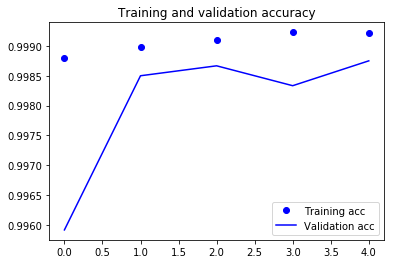

<Figure size 432x288 with 0 Axes>

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

**Step 2:** Using `l2` regularization with regularization parameter = 0.01.

In [51]:
l2 = regularizers.l2(0.01)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2))
model.add(layers.Dense(10, activation='softmax'))

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                36928     
__________

In [53]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=5, 
                    batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 136us/step - loss: 0.4218 - acc: 0.9311 - val_loss: 0.1456 - val_acc: 0.9734
Epoch 2/5
48000/48000 [==============================] - 6s 123us/step - loss: 0.1175 - acc: 0.9765 - val_loss: 0.1249 - val_acc: 0.9711
Epoch 3/5
48000/48000 [==============================] - 6s 123us/step - loss: 0.0908 - acc: 0.9817 - val_loss: 0.0852 - val_acc: 0.9831
Epoch 4/5
48000/48000 [==============================] - 6s 123us/step - loss: 0.0764 - acc: 0.9844 - val_loss: 0.0698 - val_acc: 0.9874
Epoch 5/5
48000/48000 [==============================] - 6s 122us/step - loss: 0.0662 - acc: 0.9871 - val_loss: 0.0906 - val_acc: 0.9789


In [54]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 73us/step


0.9801

<Figure size 432x288 with 0 Axes>

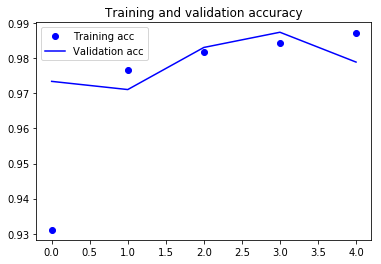

<Figure size 432x288 with 0 Axes>

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

**Step 3:** Using `l2` regularization with regularization parameter = 0.05.

In [56]:
l2 = regularizers.l2(0.05)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2))
model.add(layers.Dense(10, activation='softmax'))

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_10 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                36928     
__________

In [58]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=5, 
                    batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 138us/step - loss: 0.6479 - acc: 0.9209 - val_loss: 0.1744 - val_acc: 0.9686
Epoch 2/5
48000/48000 [==============================] - 6s 121us/step - loss: 0.1502 - acc: 0.9715 - val_loss: 0.1220 - val_acc: 0.9780
Epoch 3/5
48000/48000 [==============================] - 6s 122us/step - loss: 0.1233 - acc: 0.9760 - val_loss: 0.1180 - val_acc: 0.9781
Epoch 4/5
48000/48000 [==============================] - 6s 122us/step - loss: 0.1088 - acc: 0.9799 - val_loss: 0.0983 - val_acc: 0.9830
Epoch 5/5
48000/48000 [==============================] - 6s 122us/step - loss: 0.0986 - acc: 0.9813 - val_loss: 0.0895 - val_acc: 0.9853


In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 73us/step


0.9862

<Figure size 432x288 with 0 Axes>

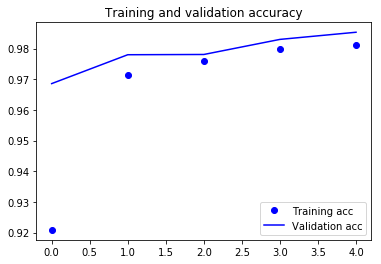

<Figure size 432x288 with 0 Axes>

In [60]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()